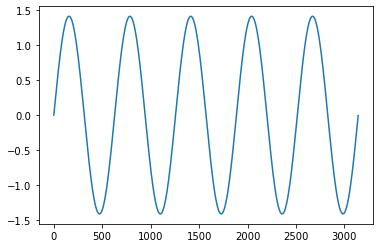

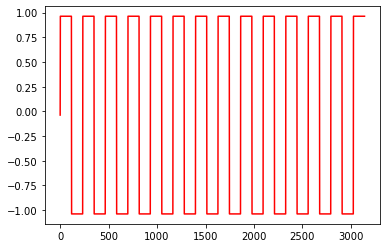

In [1]:
import csv
import numpy as np

# データの読み込み
with open('./dat1.txt', 'r') as f1:
    dataReader1 = csv.reader(f1)
    l1 = [row for row in dataReader1]
    l11 = [float(row[0]) for row in l1]
    array1 = np.array(l11)
with open ('/Users/takumi-hiraoka/Desktop/programing演習/report/dat2.txt', 'r') as f2:
    dataReader2 = csv.reader(f2)
    l2 = [row for row in dataReader2]
    l22 = [float(row[0]) for row in l2]
    array2 = np.array(l22)
    
# ICAの実行
# データの長さを取得
N = len(array1)

# 平均を0にする
ave_1 = np.mean(array1)
ave_2 = np.mean(array2)
array1 -= ave_1
array2 -= ave_2

# シグマ行列の計算
cov_mat = np.matrix([[np.dot(array1, array1), np.dot(array1, array2)], [np.dot(array2, array1), np.dot(array2, array2)]]) * (1/N)

# 固有値の導出
eig_val = np.linalg.eig(cov_mat)[0]

# 固有ベクトル(対角行列)の導出
E = np.linalg.eig(cov_mat)[1]

D = np.matrix([[eig_val[0], 0], [0, eig_val[1]]])
D_2 = np.matrix([[(eig_val[0])**(-0.5), 0], [0, (eig_val[1])**(-0.5)]])

# V, Z行列の導出
v_i = np.dot(E, D_2)
V = np.dot(v_i, E.T)

# Z行列の導出
X = np.matrix([array1, array2])
Z = np.dot(V, X)

# Zの共分散行列が単位行列になることを確認
z0, z1 = np.array(Z[0]), np.array(Z[1])
Z_cov = np.matrix([[float(np.dot(z0, z0.T)), float(np.dot(z0, z1.T))], [float(np.dot(z1, z0.T)), float(np.dot(z1, z1.T))]]) * (1/N)

# 正規化する関数
def normalization(m):
    m[0] = m[0] / np.linalg.norm(m[0])
    m[1] = m[1] / np.linalg.norm(m[1])
    return m


# 収束条件を管理する関数
def change(w_before, w):
    wp = w_before -w
    if abs(wp[0, 0]) < 0.0001 and abs(wp[0, 1]) < 0.0001 and abs(wp[1, 0]) < 0.0001 and abs(wp[1, 1]) < 0.0001:
        return 1
    
w = np.matrix([[2.0, 1.0], [10.0, -1.0]])
w = normalization(w)

while True:
    w_before = w.copy()
    for i in range(2):
        a = np.dot(w[i], Z)
        a = pow(np.array(a), 3)
        a = np.array(a).flatten()
        ll_1 = np.array([Z[0, i] * a[i] for i in range(N)])
        ll_2 = np.array([Z[1, i] * a[i] for i in range(N)])       
        val0 = np.sum(ll_1) / N
        val1 = np.sum(ll_2) / N
        w[i] = np.array([val0, val1]) - w[i] *3
    w = normalization(w)
    if w[0, 0] < 0:
        w *= (-1)
    if change(w_before, w) == 1:
        break

# 信号源データの取得
Y = np.dot(w, Z)

# 描画する
import matplotlib.pyplot as plt
X = np.array(X)
Y = np.array(Y)
xl = [i for i in range(N)]
plt.plot(xl, np.array(Y[0]))
plt.show()
plt.plot(xl, np.array(Y[1]), color = 'red')
plt.show()